In [171]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [172]:
df = pd.read_csv("housing.csv")

In [173]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [174]:
# number of sample
m = 1000
income_vs_price = df[["median_income","median_house_value"]].head(m).to_numpy()
income = income_vs_price[:,0]
price = income_vs_price[:,1]
price = price / 10000
print(f"income: {income[:5]}")
print(f"price: {price[:5]}")

income: [8.3252 8.3014 7.2574 5.6431 3.8462]
price: [45.26 35.85 35.21 34.13 34.22]


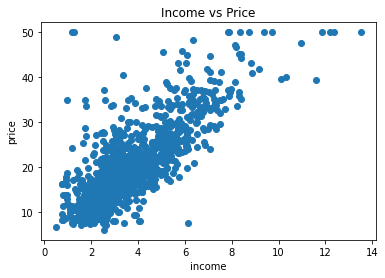

In [175]:
plt.scatter(income, price)
plt.title("Income vs Price")
plt.xlabel("income")
plt.ylabel("price")
plt.show()

In [183]:
def get_yhats_costs(w,x_vector, b,y_vector):
    y_hats = np.dot(w ,x_vector) + b
    errors = (y_hats - y_vector) ** 2 
    cost = np.sum(errors) / (2* errors.shape[0])
    return  y_hats, cost

def do_gradient_descent(alpha, w, b, x_vector, y_hats, y_vector):
    dj_dw = (y_hats - y_vector) * x_vector
    dj_db = (y_hats - y_vector)
    w = w - alpha * (np.sum(dj_dw) / dj_dw.shape[0])
    b = b - alpha * (np.sum(dj_db) / dj_db.shape[0])
    return w,b    

In [184]:
epochs = 100
w = 0
b = 0
alpha = 0.05
costs = []
for epoch in range(epochs):
    y_hats, cost = get_yhats_costs(w, income, b, price)
    costs.append(cost)
    # print(f"epoch {epoch} -> cost: {cost}")
    w,b = do_gradient_descent(alpha, w, b, income, y_hats, price)    
print(f"final cost: {cost}")

final cost: 16.80093910434016


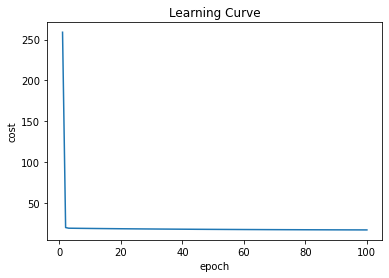

In [185]:
plt.plot(np.arange(epochs)+ 1, costs)
plt.title("Learning Curve")
plt.xlabel("epoch")
plt.ylabel("cost")
plt.show()

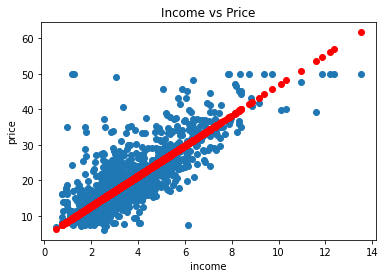

In [178]:
plt.scatter(income, price)
plt.scatter(income,y_hats, c = 'red')
plt.title("Income vs Price")
plt.xlabel("income")
plt.ylabel("price")
plt.show()